<a href="https://colab.research.google.com/github/eshreyareddy/Clustering/blob/main/Timeseries_data_using_pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clustering of Timeseries data using pretrained models**

 Time series is a sequence of data points collected or recorded at regular time intervals. Each data point typically represents the value of some observed phenomenon at a specific time. Time series data is ubiquitous and can be found in various domains, including finance, economics, science, engineering, and social sciences.

**Key characteristics of time series data include:**

Temporal Ordering: Unlike other types of data, the order of observations in a time series is critical, as it captures the dynamics of the phenomenon over time.

***Trends and Seasonality:***

Trend: A long-term increase or decrease in the data. For example, a gradual rise in stock prices over several years.
Seasonality: Regular and predictable patterns that repeat over a known period, like daily, monthly, or quarterly sales patterns.
Cyclical Patterns: These are patterns that occur on irregular cycles, unlike the fixed cycles of seasonality.

Noise: Random variation in the data.

**Applications of Time Series Analysis**

Time series analysis is used to analyze and predict future values based on previously observed values. It has various applications, such as:

*Economic Forecasting:* Predicting GDP, unemployment rates, or stock market trends.
*Sales Forecasting:* Estimating future sales in retail, helping in inventory management and planning.
*Environmental Science:* Analyzing temperature changes, sea level rise, or atmospheric CO2 concentrations.

*Engineering:* Monitoring and predicting the behavior of complex systems over time, such as machinery or infrastructure health.
Medicine: Tracking patient health indicators over time.

**Techniques in Time Series Analysis**

Several techniques are used to analyze time series data, including:

*Descriptive Analysis:* Understanding the basic features of the time series, like mean, median, trends, and seasonality.

*Time Series Decomposition:* Separating a time series into trend, seasonal, and residual components.

*Statistical Tests:* For example, tests for stationarity (like the Augmented Dickey-Fuller test).

*Forecasting Models:* Such as ARIMA, seasonal ARIMA, Holt-Winters exponential smoothing, and more advanced machine learning models.

*Anomaly Detection:* Identifying unusual data points that do not conform to the typical pattern.

Time series analysis is a powerful tool for making informed decisions based on the temporal patterns and characteristics of the data.







**Load the Time Series Data:** Import the time series data you're interested in clustering.
**Data Preprocessing:** Prepare the data for analysis. This includes handling missing values, normalizing or standardizing the data, and potentially transforming the data into a suitable format for clustering.

**Select a Pretrained Model:** Choose a pretrained model suitable for time series clustering. Common choices include K-Means, hierarchical clustering, or more advanced models like Self-Organizing Maps (SOM) or deep learning-based models.

**Apply the Model to Cluster the Data:** Use the model to cluster the time series data.
**Analyze and Visualize the Clusters:** Examine the characteristics of each cluster and visualize the results.

The **prices.csv** dataset contains time series data with stock prices, including columns for date, symbol (stock ticker), open, close, low, high prices, and volume. To illustrate clustering of this time series data, we can follow these steps:

Select the Target Feature for Clustering: Determine which feature(s) to use for clustering. Common choices are closing prices or a combination of features like open, close, low, and high prices.

**Data Preprocessing:**
Convert the 'date' column to a datetime type.
Handle missing values if necessary.
Normalize or standardize the selected features.
Transform Data for Clustering: Aggregate or transform the data into a suitable format. For instance, we might focus on daily closing prices for a specific stock or a set of stocks.

**Choose and Apply a Clustering Model:** Use a clustering algorithm suitable for time series data. K-Means is a common choice, but it requires the data to be of uniform length and shape. Alternatively, advanced techniques like hierarchical clustering or SOM can be used.

**Analyze and Visualize the Clusters:** Once the clustering is done, analyze the characteristics of each cluster and visualize them, for example, by plotting the time series in each cluster.
Given the likely large size of this dataset, we'll focus on a subset of the data for clustering. Let's preprocess the data by focusing on the closing prices of a single stock as an example. We'll choose a stock symbol, transform the data accordingly, and then apply a clustering model.

Let's start with data preprocessing: selecting a stock and focusing on its closing prices over time. ​

The data has been filtered for the selected stock (the first symbol in the dataset), and we're focusing on the 'close' price over time. Next, we'll proceed with clustering. Since the dataset potentially contains many distinct dates, applying a direct clustering algorithm like K-Means might not be straightforward due to the high dimensionality. Instead, we can use a technique like Time Series K-Means, which is specifically designed for clustering time series data.

**Steps for Clustering:**
Transform Data for Clustering: Time series data often needs to be transformed into a uniform shape for clustering. We can use time window slicing or aggregation to achieve this.

**Clustering with Time Series K-Means:**

Use the Time Series K-Means algorithm, which is available in libraries like tslearn.
Determine the number of clusters (this may require some experimentation).


In [2]:
pip install tslearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 5.2 MB/s eta 0:00:00


In [3]:
from google.colab import files

uploaded = files.upload()


Saving prices.csv to prices.csv


In [6]:
import pandas as pd
import numpy as np

# Load your dataset
file_path = 'prices.csv'
prices_data = pd.read_csv(file_path)

# Select a specific stock (e.g., the first stock in the dataset)
selected_stock = prices_data['symbol'].unique()[0]

# Filter the data for the selected stock and focus on the 'close' price
stock_data = prices_data[prices_data['symbol'] == selected_stock][['date', 'close']]

# Convert 'date' to datetime
stock_data['date'] = pd.to_datetime(stock_data['date'])

# Reshape data for clustering
X = np.array(stock_data['close']).reshape(-1, 1)


In [7]:
from tslearn.clustering import TimeSeriesKMeans
import numpy as np

# Assuming 'stock_data' is your time series dataframe with 'close' prices
# You might need to preprocess or transform 'stock_data' to get uniform length series

# Example of reshaping (adjust according to your data)
X = np.array(stock_data['close']).reshape(-1, 1)

# Define the number of clusters
n_clusters = 3  # This is an example, adjust based on your analysis

# Apply Time Series K-Means
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", max_iter=10)
clusters = model.fit_predict(X)

# clusters now contains the cluster labels for each time series data point


In [16]:
# Display the structure and some contents of stock_data
print(stock_data.info())
print(stock_data.head())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    251 non-null    datetime64[ns]
 1   close   251 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.9 KB
None
        date       close
0 2016-01-05  125.839996
1 2016-01-06  119.980003
2 2016-01-07  114.949997
3 2016-01-08  116.620003
4 2016-01-11  114.970001


1. Time Series Visualization with Moving Average
Objective: To smooth out short-term fluctuations and identify long-term trends in the stock's closing price.
Method: Calculated a 30-day moving average of the stock's closing price and plotted it alongside the actual closing prices.
Insights: This helps in visualizing the overall trend of the stock price, making it easier to spot general upward or downward movements.
2. Time Series Decomposition
Objective: To decompose the stock price time series into trend, seasonality, and residual components.
Method: Applied seasonal decomposition using an additive model.
Insights: This step breaks down the time series to understand underlying patterns, such as long-term trends (upward/downward) or recurring seasonal patterns.
3. Statistical Analysis for Stationarity
Objective: To determine if the time series data is stationary, which is crucial for certain statistical models and forecasting techniques.
Method: Conducted the Augmented Dickey-Fuller test.
Insights: The result indicates whether the time series data has a unit root and if it is stationary or not. This information is essential for deciding on further modeling approaches.
4. Predictive Modeling with ARIMA
Objective: To forecast future stock prices based on historical data.
Method: Built an ARIMA (AutoRegressive Integrated Moving Average) model as an example of a time series forecasting model.
Insights: This model helps predict future stock prices based on their past behavior. The model's parameters (p, d, q) need careful tuning based on the specific data.
5. Anomaly Detection
Objective: To identify unusual fluctuations in the stock price that deviate significantly from the norm.
Method: Implemented a simple threshold-based anomaly detection, marking data points that lie beyond a specified standard deviation as anomalies.
Insights: Anomalies might indicate significant market events, providing insights for further investigation.
6. Correlation Analysis (If Additional Data Available)
Objective: To find correlations between the stock's price and other financial indicators or stocks.
Method: This would involve calculating correlation coefficients between different time series datasets.
Insights: Understanding correlations can reveal how different stocks or financial indicators move in relation to each other.
7. Expand Dataset for Clustering (If Multiple Time Series Available)
Objective: To group similar time series patterns together, useful if analyzing multiple stocks or financial indicators.
Method: Applying clustering techniques like K-Means or hierarchical clustering to multiple time series data.
Insights: Clustering can reveal stocks with similar price movements or volatility, aiding in portfolio diversification strategies.

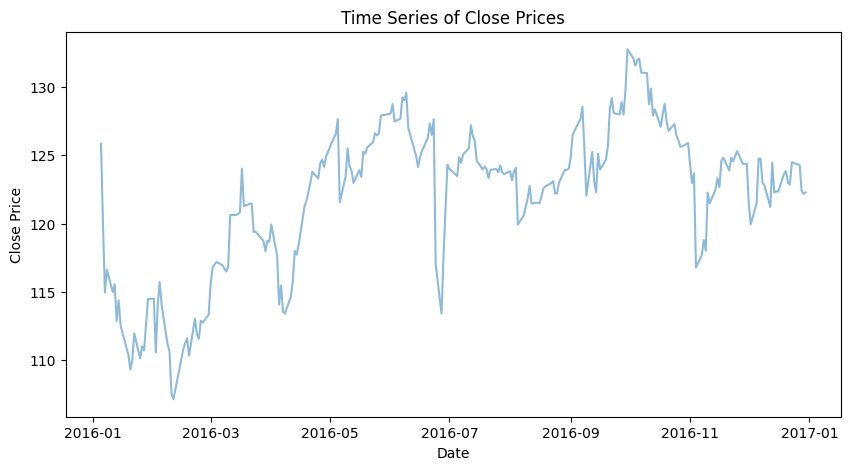

In [18]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(stock_data['date'], stock_data['close'], alpha=0.5)
plt.title('Time Series of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


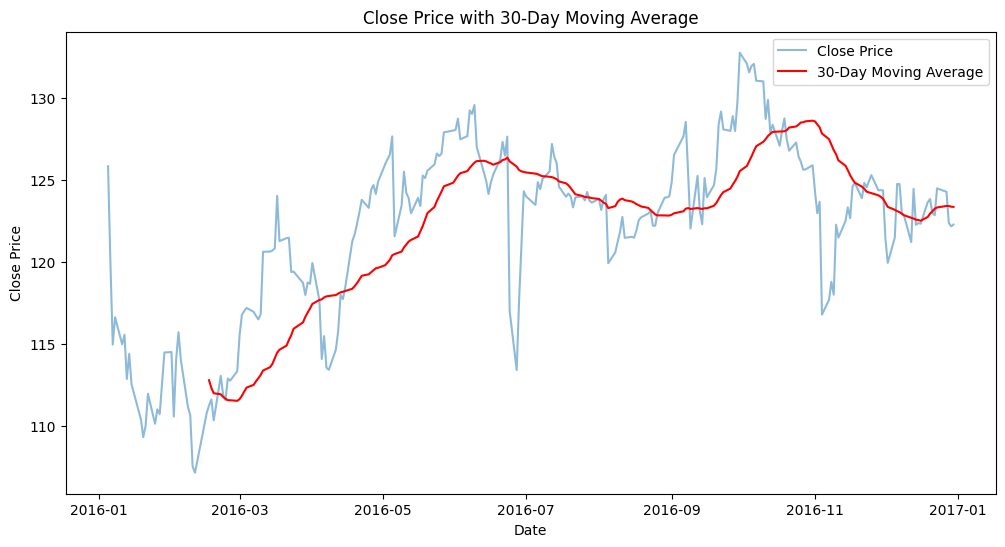

In [19]:
# Calculate a simple moving average
stock_data['SMA_30'] = stock_data['close'].rolling(window=30).mean()

# Plot the time series with the moving average
plt.figure(figsize=(12, 6))
plt.plot(stock_data['date'], stock_data['close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['date'], stock_data['SMA_30'], label='30-Day Moving Average', color='red')
plt.title('Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


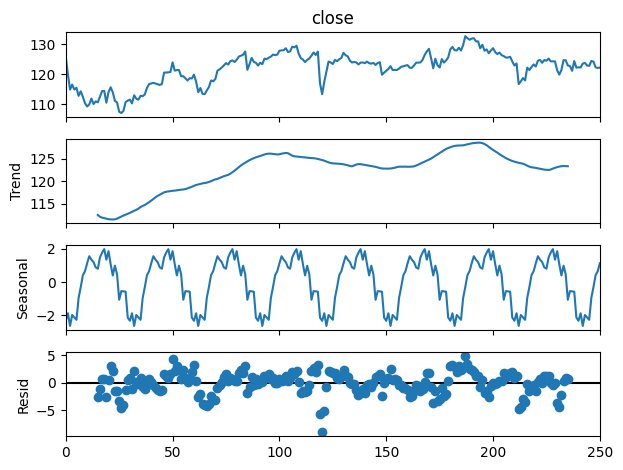

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the time series
decomposition = seasonal_decompose(stock_data['close'], model='additive', period=30)

# Plotting the decomposed components
decomposition.plot()
plt.show()


In [22]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
adf_result = adfuller(stock_data['close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Interpretation of the result
if adf_result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Statistic: -2.640028175076412
p-value: 0.08500319291540487
The time series is not stationary.


In [24]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA Model (example parameters - adjust based on your analysis)
model = ARIMA(stock_data['close'], order=(5,1,0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=5)
print(forecast)


251    122.404766
252    122.589971
253    122.539072
254    122.498893
255    122.492028
Name: predicted_mean, dtype: float64


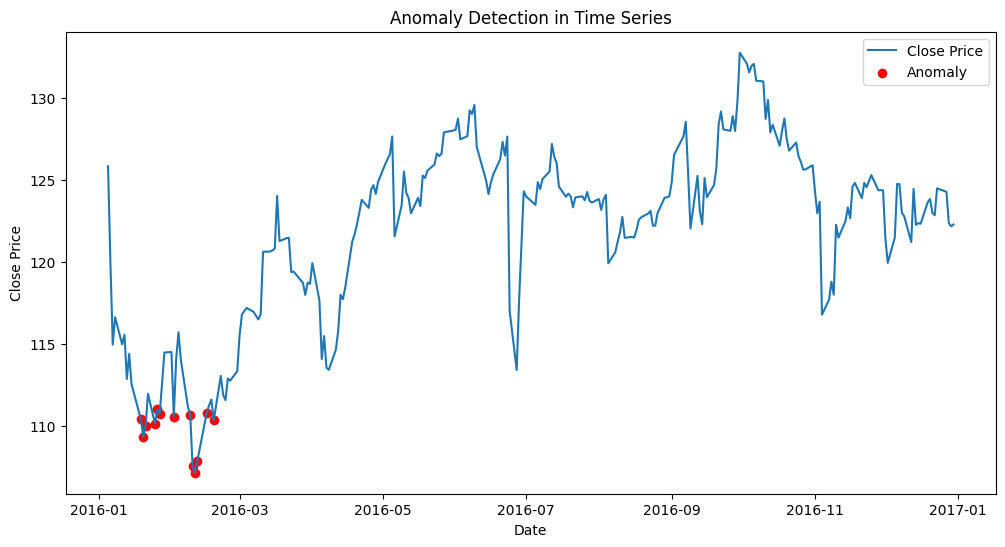

In [23]:
# Simple threshold-based anomaly detection
stock_data['anomaly'] = abs(stock_data['close'] - stock_data['close'].mean()) > (2 * stock_data['close'].std())

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(stock_data['date'], stock_data['close'], label='Close Price')
plt.scatter(stock_data[stock_data['anomaly']]['date'], stock_data[stock_data['anomaly']]['close'], color='red', label='Anomaly')
plt.title('Anomaly Detection in Time Series')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


In [25]:
pip install statsmodels


In [27]:
# If your data is daily
stock_data = stock_data.asfreq('D')


In [30]:

# Filling missing values or dropping them
stock_data['close'] = stock_data['close'].fillna(method='ffill')  # Forward fill
# Or drop missing values
# stock_data.dropna(inplace=True)



In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(stock_data['close'], order=(5, 1, 0))  # Adjust the order as needed
fitted_model = model.fit()

# Forecast future values
forecast = fitted_model.forecast(steps=5)
print(forecast)


2016-12-31    122.314415
2017-01-01    122.568425
2017-01-02    122.617902
2017-01-03    122.607401
2017-01-04    122.600379
Freq: D, Name: predicted_mean, dtype: float64


<ipython-input-32-c7653b095537>:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_dates = pd.date_range(start=stock_data.index[-1], periods=len(forecast) + 1, closed='right')


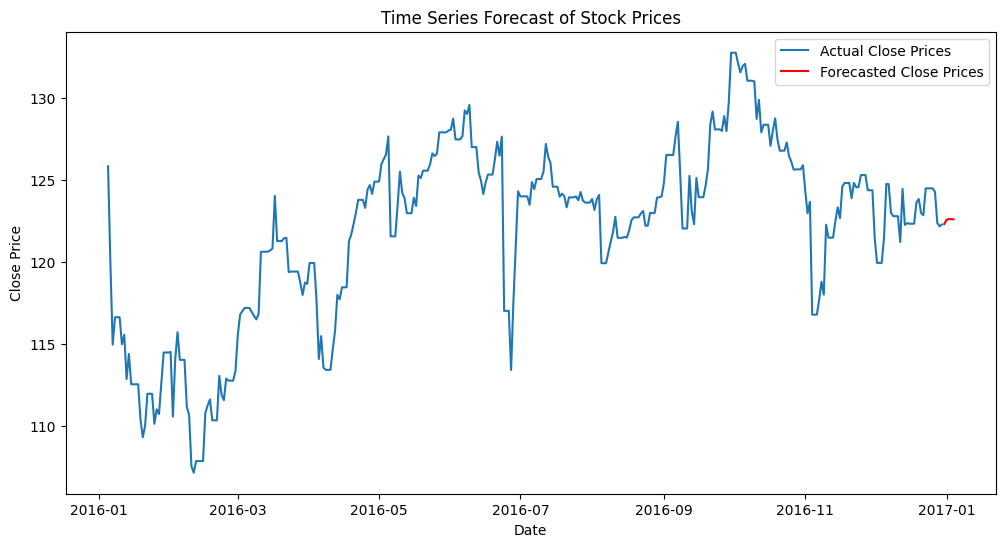

In [32]:
import matplotlib.pyplot as plt

# Plot the actual time series data
plt.figure(figsize=(12, 6))
plt.plot(stock_data['close'], label='Actual Close Prices')

# Assuming 'forecast' contains your ARIMA model predictions
# You need to create a date range for the forecasted values
# This should start from the day after the last date in your historical data
forecast_dates = pd.date_range(start=stock_data.index[-1], periods=len(forecast) + 1, closed='right')

# Plot the forecasted values
plt.plot(forecast_dates, forecast, label='Forecasted Close Prices', color='red')

# Add labels and title
plt.title('Time Series Forecast of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()

# Show the plot
plt.show()
